In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import networkx as nx
import sys
import os
import pandas as pd
import spycon
import glob

#https://github.com/christiando/spycon
#requires pip install git+https://github.com/christiando/spycon
#https://github.com/pwollstadt/IDTxl
#requires pip install git+https://github.com/pwollstadt/IDTxl
import spycon_utils

from typing import Tuple

from sklearn.cluster import DBSCAN

sys.path.append("..")
from analysis_package import maxlab_analysis as mla

import shutil

Jpype is not available on this system. Install it from https://pypi.python.org/pypi/JPype1 to use JAVA/JIDT-powered CMI estimation.



  File "c:\Users\mrwun\anaconda3\envs\func-conn\Lib\site-packages\idtxl\estimators_jidt.py", line 9, in <module>
    import jpype as jp


Using cpu device


In [2]:
def get_filepath(div, well, method, remove_bursts = None): #In theory, can put in a parameter for all options, in order
    filepath = f"R:/Experimental Data/nathan_senior_project_analysis/stim_removal_network_graphs_run_3/{method}/DIV{div}/well_no={well}/"
    if remove_bursts is not None:
        filepath += f"remove_bursts={remove_bursts}/"
    return filepath

In [3]:
filepath = get_filepath(33, 0, "CoincidenceIndex", remove_bursts = True)
spycon_result = spycon.load_connectivity_result("spycon_network", filepath)
grouped_mapping_df = pd.read_csv(filepath + "08_grouped_mapping_df.csv")

In [4]:
spycon_result

In [5]:
grouped_mapping_df

,channel,electrode,x,y,frequency,mean amp
0,0,9051,542.5,717.5,1.400012,0.589144
1,1,11849,3307.5,927.5,1.600014,1.878607
2,2,13437,297.5,1067.5,14.300128,3.085710
3,3,12291,3342.5,962.5,1.100010,0.751733
4,4,12997,297.5,1032.5,2.800025,0.562933
...,...,...,...,...,...,...
616,1015,21917,2397.5,1732.5,2.400021,1.100242
617,1019,22359,2432.5,1767.5,1.750016,1.718806
618,1021,12687,2572.5,997.5,3.500031,0.712002
619,1022,21871,1592.5,1732.5,0.200002,4.086903


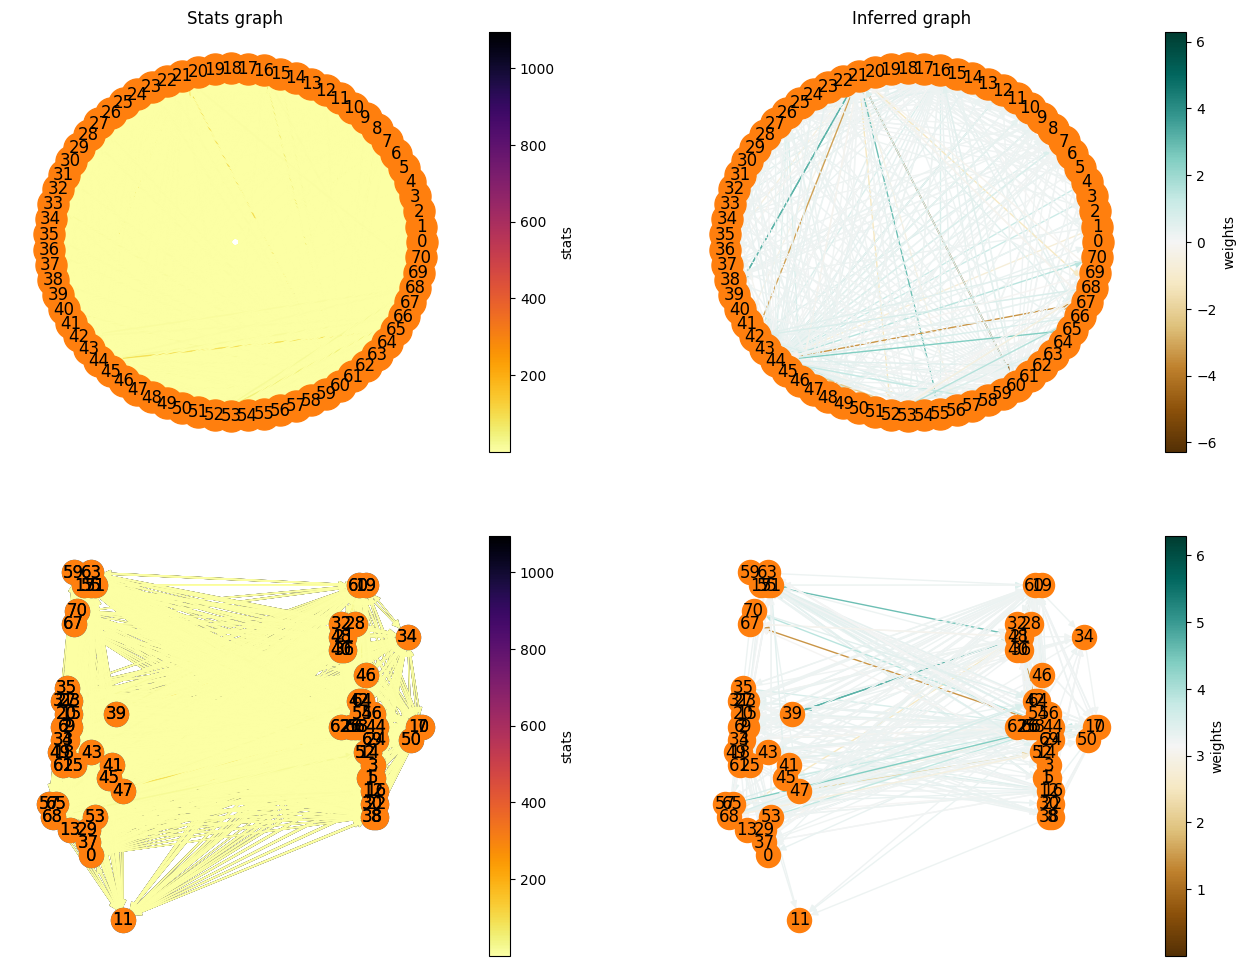

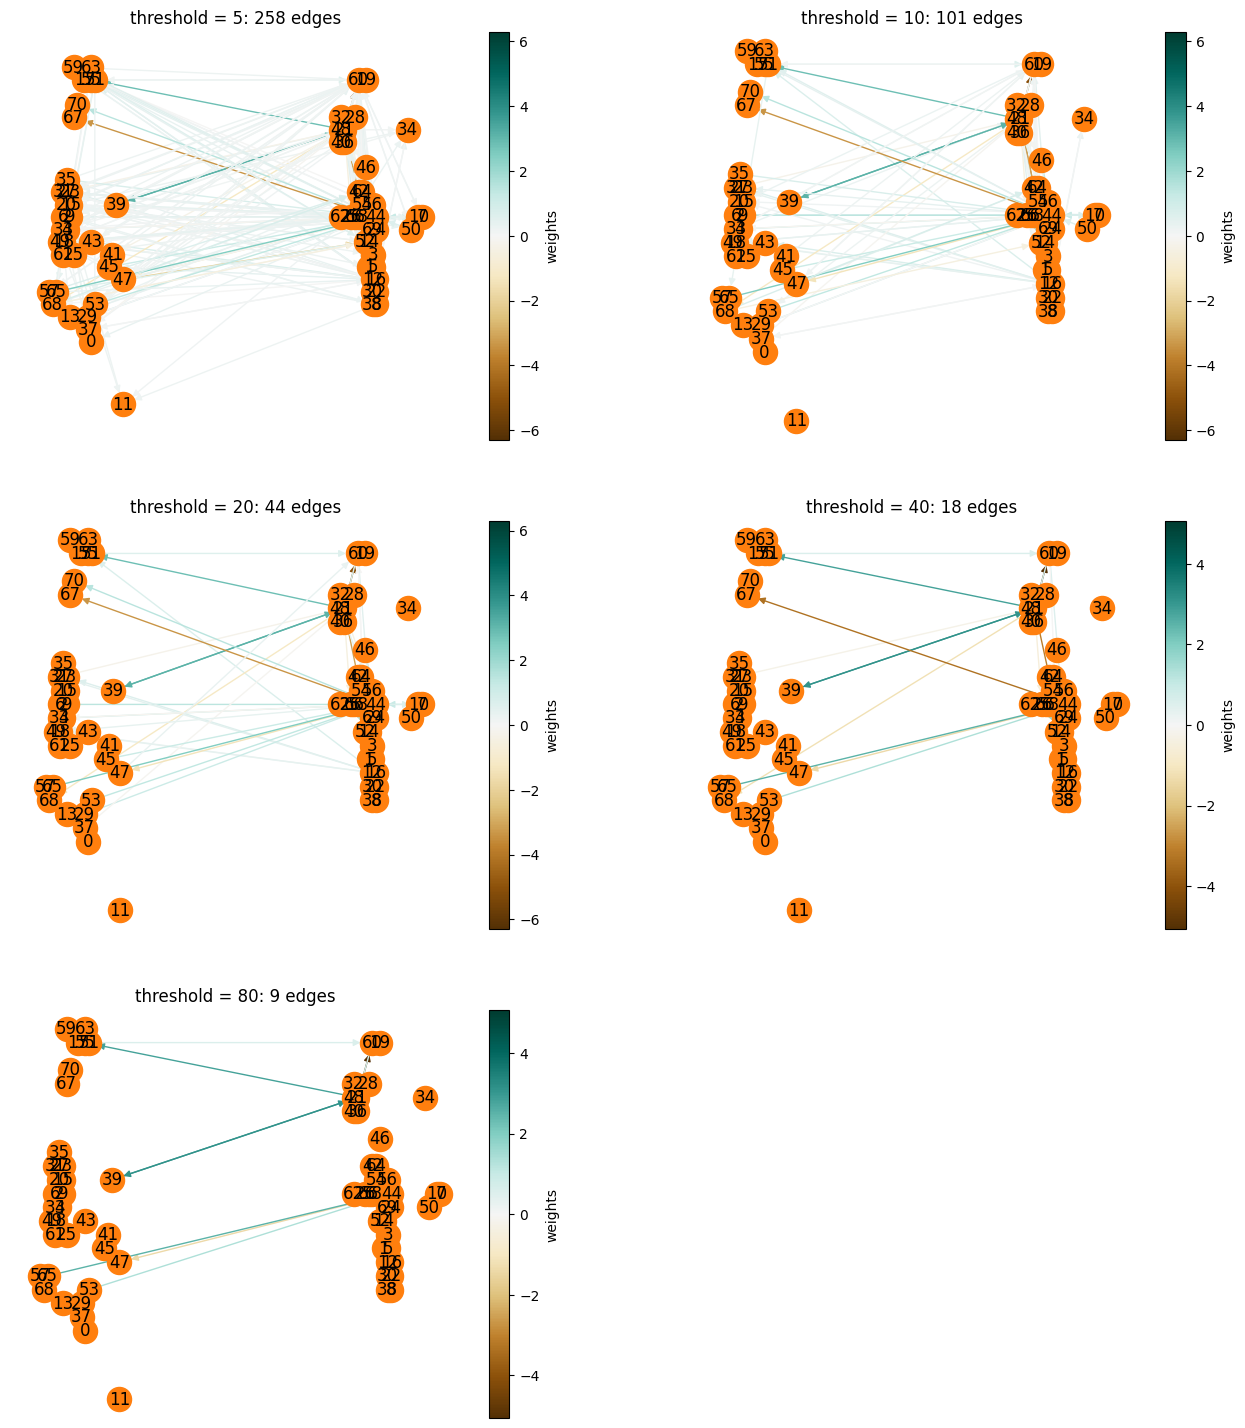

In [6]:

fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(221)
g1 = spycon_result.draw_graph(graph_type='stats', ax=ax1)
pos1 = nx.circular_layout(g1)
for i in grouped_mapping_df.index:
    pos1[i] = np.array(grouped_mapping_df.loc[i, ["x", "y"]] )

ax1.set_title('Stats graph')
ax2 = fig.add_subplot(222)
g2 = spycon_result.draw_graph(graph_type='weighted', ax=ax2)
pos2 = nx.circular_layout(g2)
for i in grouped_mapping_df.index:
    pos2[i] = np.array(grouped_mapping_df.loc[i, ["x", "y"]])
ax2.set_title('Inferred graph')

ax3=fig.add_subplot(223)
nx.draw(g1, pos1, with_labels=True)
cmap = plt.get_cmap("inferno_r")
weights = list(nx.get_edge_attributes(g1, "weight").values())
min_weight, max_weight = np.amin(weights), np.amax(weights)
norm = mpl.colors.Normalize(vmin=min_weight, vmax=max_weight)
nx.draw(g1, pos1, with_labels=True,
        node_color="C1",
        edge_color=weights,
        edge_vmin=min_weight,
        edge_vmax=max_weight,
        edge_cmap=cmap,
        )
plt.colorbar(
            mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
            ax = plt.gca(), 
            label="stats",
        )

ax4=fig.add_subplot(224)
cmap = plt.get_cmap("BrBG")
weights = list(nx.get_edge_attributes(g2, "weight").values())
max_weight = np.amax(np.absolute(weights))
norm = mpl.colors.Normalize(vmin=min_weight, vmax=max_weight)
nx.draw(g2, pos2, with_labels=True,
        node_color="C1",
        edge_color=weights,
        edge_vmin=-max_weight,
        edge_vmax=max_weight,
        edge_cmap=cmap,
        )
plt.colorbar(
            mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
            ax = plt.gca(), 
            label="weights",
        )
plt.show()




fig = plt.figure(figsize=(16,18))
for num, thresh in enumerate([5, 10, 20, 40, 80]):
    spycon_result.set_threshold(thresh)
    ax = plt.subplot(3, 2, num+1)
    
    try:
        g = spycon_utils.draw_graph_with_mapping(spycon_result, grouped_mapping_df, "weighted", ax = ax)
    except Exception as err:
        print(err)
    plt.title("threshold = " + str(thresh) + ": " + str(len(g.edges)) + " edges")
plt.show()
